# Team Information (Beginner Track)

In [1]:
import pandas as pd
Name = ['Jiani Song', 'Tiffany Yu', 'Weiyue Li', 'Yi Li']
PID = ['A16201789', 'A16341528', 'A16226730', 'A16316586']
Email = ['jis014@ucsd.edu', 'z5yu@ucsd.edu', 'wel019@ucsd.edu', 'yil115@ucsd.edu']
Team_info = pd.DataFrame().assign(Name = Name, PID = PID, Email = Email).set_index('Name')
Team_info

,PID,Email
Name,,
Jiani Song,A16201789,jis014@ucsd.edu
Tiffany Yu,A16341528,z5yu@ucsd.edu
Weiyue Li,A16226730,wel019@ucsd.edu
Yi Li,A16316586,yil115@ucsd.edu


# Main Import

In [2]:
import re
import nltk
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import twitter_samples
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('twitter_samples')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/yil115/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yil115/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/yil115/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/yil115/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

# Prompt Part One: Explore Data

## Introduction

There are two main types of religions in the world: Eastern Religions and Western Religions. Western religions are typically strictly following one supreme God, such as the Holy Mary of Catholics or the Jesus of Christ of Christian. However, Eastern religions believe in more than one God or the presence of some unnatural power, such as the 33 Million Gods of Hinduism and the self-development of Taoism. Besides that, the main points of these two categories of religions are different: the western religions believe that God is above all creatures, whereas the eastern religions believe that all animals are equally created.

Although these religions are different, their word choices are an interesting topic to explore. From a linguistic perspective, we can categorize every word in religious text into positive connotation and negative connotation. Therefore, we are interested in finding the individual trend of the proportion of positive words of each chapter for each book, as well as the general trend of the proportion of positive words for all books in the dataset. The nltk package , which includes the Sentiment Intensity Analyzer, helped us define categorize words into positive and negative categories. While using the package, Python will assign positive and negative indices to each word. If the positive index is significantly greater than the negative index, then the word is positive. If the positive index is considerably smaller than the negative index, then the word is negative. If the positive index and the negative index are roughly the same, then the word is neutral. 

In our dataset, we categorized all 8 of our books into Western (The Book of Wisdom, The Book of Proverbs, The Book of Ecclesiastes, and The Book of Ecclesiasticus) and Eastern (The Book of Buddhism, Tao Te Ching, The Yoga Sutra, and The Upanishads). 


### Datasets

In [3]:
# Get dataset (labelled)
label_context = pd.read_csv("AllBooks_baseline_DTM_Labelled.csv")
label_context_copy = pd.read_csv("AllBooks_baseline_DTM_Labelled.csv")
label_context = label_context.dropna()
label_context_copy = label_context_copy.dropna()

In [4]:
label_context.sample(10)

,Unnamed: 0,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
150,Upanishad_Ch24,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,YogaSutra_Ch127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,Upanishad_Ch127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
513,BookOfEcclesiastes_Ch5,0,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,YogaSutra_Ch100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30,Buddhism_Ch31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
523,BookOfEccleasiasticus_Ch3,0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Buddhism_Ch15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,Buddhism_Ch18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,Upanishad_Ch125,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Cleaning / Preprocessing

To use groupby by book, we first use the built-in function split to create a new column containing only the name of the books. We then groupby by the book names and sum up all the word counts for each word so that each row represents the total number of times that each particular word appears in a book. We also dropped the none type in our DataFrame so that we could run analysis more efficiently.


In [5]:
# fucntion that normalize the book name
def new_label(book_name):
    return book_name.split('_')[0]

# apply function to the copy if dataset
label_context_copy = (label_context_copy.assign(Label = label_context_copy['Unnamed: 0']
                                               .apply(new_label))
                                               .set_index("Label")
                                               .reset_index()
                     )

# groupby the copy of dataset based on book name
label_grouped = label_context_copy.groupby("Label").sum()
label_grouped

# method that find the top 20 words in each book
column = list(label_grouped.columns)
book = list(label_grouped.index)

### Explore trend / data

There are two main types of religions in the world: Eastern Religions and Western Religions. Western religions are typically strictly following one and only supreme god, such as the Holy Mary or the Jesus of Christ; however, Eastern religions believe in more than one god or the presence of some unnatural power, such as the 33 Million Gods of Hinduism and the self development of Taoism. Besides that, the main point of these two types of religions are different: the western religions believe that God is above all creatures, whereas the eastern religions believe that all creatures are created equally. As a result, we predict that words such as "god", "mercy", "lord", "grace" are more related to Western religious and words such as "nature", "concentration", "world", "spiritual" are more related to Eastern religious.


### Explore the frequency of certain word usage

In [6]:
total = label_grouped.sum(axis = 1)
total = pd.DataFrame(total,columns = ['total_num_of_word'])

num_god = label_grouped.get(["god"]).merge(total, left_index = True, right_index = True)
num_god = num_god.assign(word_appearance_percentage = 100 * num_god["god"] / total["total_num_of_word"])

num_nature = label_grouped.get(["nature"]).merge(total, left_index = True, right_index = True)
num_nature = num_nature.assign(word_appearance_percentage = 100 * num_nature["nature"] / total["total_num_of_word"])

num_mercy = label_grouped.get(["mercy"]).merge(total, left_index = True, right_index = True)
num_mercy = num_mercy.assign(word_appearance_percentage = 100 * num_mercy["mercy"] / total["total_num_of_word"])

num_concentration = label_grouped.get(["concentration"]).merge(total, left_index = True, right_index = True)
num_concentration = num_concentration.assign(word_appearance_percentage = 
                                             100 * num_concentration["concentration"] / total["total_num_of_word"])

num_lord = label_grouped.get(["lord"]).merge(total, left_index = True, right_index = True)
num_lord = num_lord.assign(word_appearance_percentage = 
                                             100 * num_lord["lord"] / total["total_num_of_word"])

num_world = label_grouped.get(["world"]).merge(total, left_index = True, right_index = True)
num_world = num_world.assign(word_appearance_percentage = 
                                   100 * num_world["world"] / total["total_num_of_word"])

num_grace = label_grouped.get(["grace"]).merge(total, left_index = True, right_index = True)
num_grace = num_grace.assign(word_appearance_percentage = 
                                   100 * num_grace["grace"] / total["total_num_of_word"])

num_spiritual = label_grouped.get(["spiritual"]).merge(total, left_index = True, right_index = True)
num_spiritual = num_spiritual.assign(word_appearance_percentage = 
                                   100 * num_spiritual["spiritual"] / total["total_num_of_word"])

num_mind = label_grouped.get(["mind"]).merge(total, left_index = True, right_index = True)
num_mind = num_mind.assign(word_appearance_percentage = 
                                   100 * num_mind["mind"] / total["total_num_of_word"])

num_free = label_grouped.get(["free"]).merge(total, left_index = True, right_index = True)
num_free = num_free.assign(word_appearance_percentage = 
                                   100 * num_free["free"] / total["total_num_of_word"])

num_life = label_grouped.get(["life"]).merge(total, left_index = True, right_index = True)
num_life = num_life.assign(word_appearance_percentage = 
                                   100 * num_life["life"] / total["total_num_of_word"])

# Prompt Part Two & Three: Explore Data and Hypothesis & Experiment Testing

### Visualize the trends we found above

In our dataset, we categorized all 8 of our books into Western (left of the chart) and Eastern (right of the chart). We have picked some specific words to test their trend of proportion in each book. In this particular chart, the words we have picked are: “god”, “mercy”, “lord”, and “grace”. It is clear that these words that are known for their association with the Christianity are appearing more in the Western books than in the Eastern ones. There is also an interesting pattern to note that the Ecclesiates (Old Testament) love to use “god”, whereas the Proverbs (Old Testament)  love to use “lord” to express the same meaning.

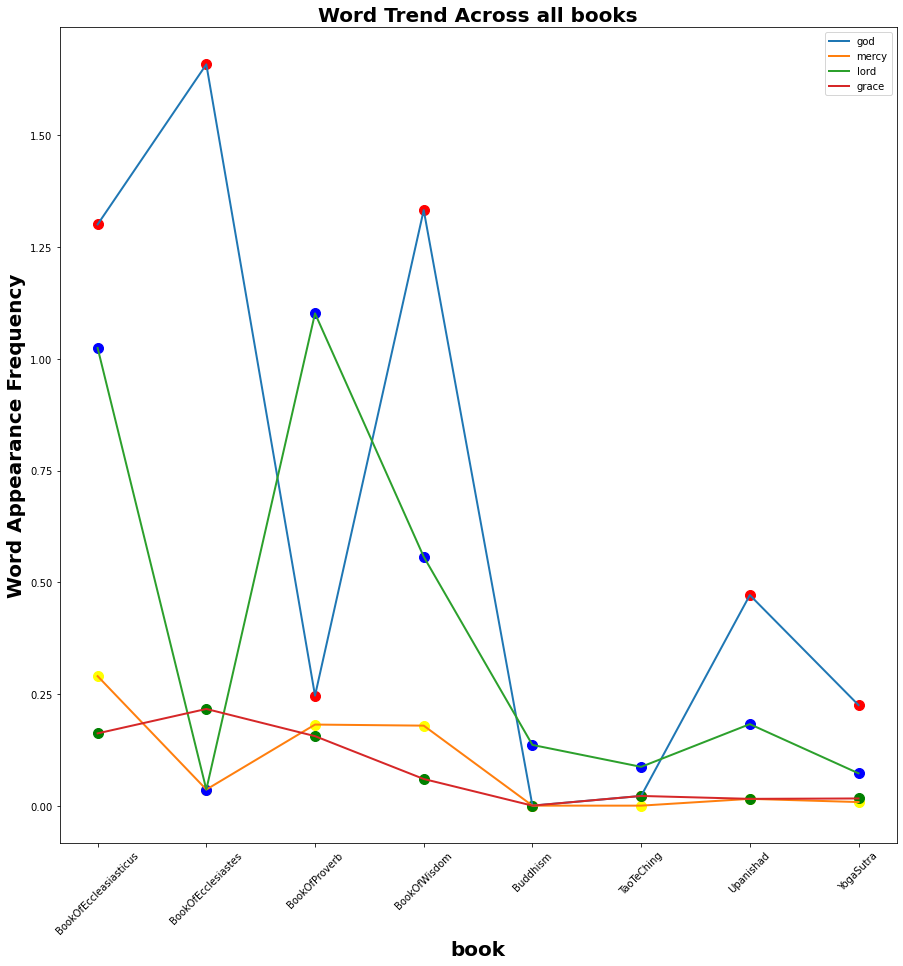

In [7]:
a = list(num_god.get("word_appearance_percentage"))
b = list(num_nature["word_appearance_percentage"])
c = list(num_mercy["word_appearance_percentage"])
d = list(num_concentration["word_appearance_percentage"])
e = list(num_lord["word_appearance_percentage"])
f = list(num_world["word_appearance_percentage"])
g = list(num_grace["word_appearance_percentage"])
h = list(num_spiritual["word_appearance_percentage"])
i = list(num_mind["word_appearance_percentage"])
j = list(num_free["word_appearance_percentage"])
k = list(num_life["word_appearance_percentage"])
  
# plot lines
plt.scatter(book, a, color='red', s = 100)
plt.plot(book, a, label = "god", linewidth = 2.0)
plt.scatter(book, c, color='yellow', s = 100)
plt.plot(book, c, label = "mercy", linewidth = 2.0)
plt.scatter(book, e, color='blue', s = 100)
plt.plot(book, e, label = "lord", linewidth = 2.0)
plt.scatter(book, g, color='green', s = 100)
plt.plot(book, g, label = "grace", linewidth = 2.0)
plt.xlabel('book', fontweight='bold', fontsize = 20)
plt.ylabel("Word Appearance Frequency", fontweight='bold', fontsize = 20)
plt.title("Word Trend Across all books", fontweight='bold', fontsize = 20)
plt.xticks(rotation = 45)
plt.gcf().set_size_inches((15, 15))
plt.legend()
plt.show()

In this second graph, we picked some words that we think might appear more in the Eastern books instead of the Western ones. These words are: “nature”, “concentration”, “world”, and “spiritual”. In the graph, it is clear that these words match our expectation. And there are two words that are kind of unique for two Eastern religions, which I think can represent the characteristics of those two religions. For example, Buddhism like to use “concentration” and YogaSutra tend to use “spiritual.”

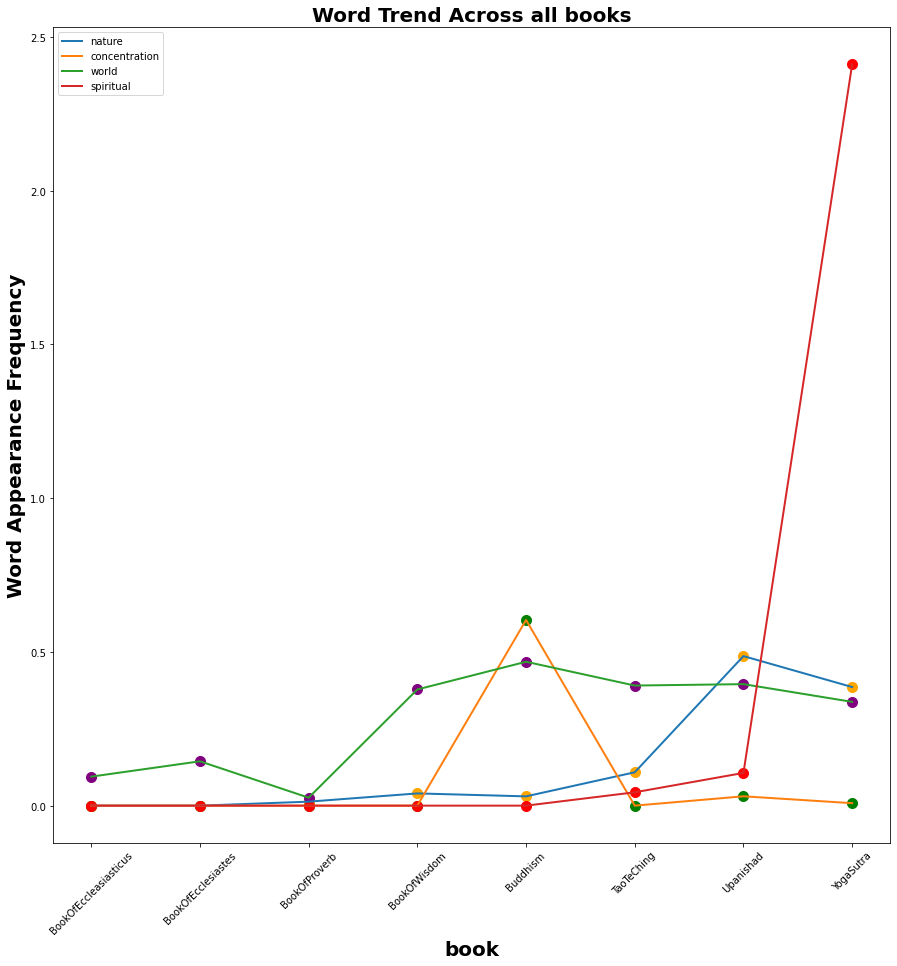

In [8]:
plt.scatter(book, b, color='orange', s = 100)
plt.plot(book, b, label = "nature", linewidth = 2.0)
plt.scatter(book, d, color='green', s = 100)
plt.plot(book, d, label = "concentration", linewidth = 2.0)
plt.scatter(book, f, color='purple', s = 100)
plt.plot(book, f, label = "world", linewidth = 2.0)
plt.scatter(book, h, color='red', s = 100)
plt.plot(book, h, label = "spiritual", linewidth = 2.0)
plt.xlabel('book', fontweight='bold', fontsize = 20)
plt.ylabel("Word Appearance Frequency", fontweight='bold', fontsize = 20)
plt.title("Word Trend Across all books", fontweight='bold', fontsize = 20)
plt.xticks(rotation = 45)
plt.gcf().set_size_inches((15, 15))
plt.legend()
plt.show()

In this third graph, we can clearly see that different word choices have different possibilities in each text. For example, the word “mind” is highly likely to appear in Buddhism and Upanishad; “free” is extremely likely to be in Tao Te Ching, and “life” is extremely likely to occur in Yoga Sutra.

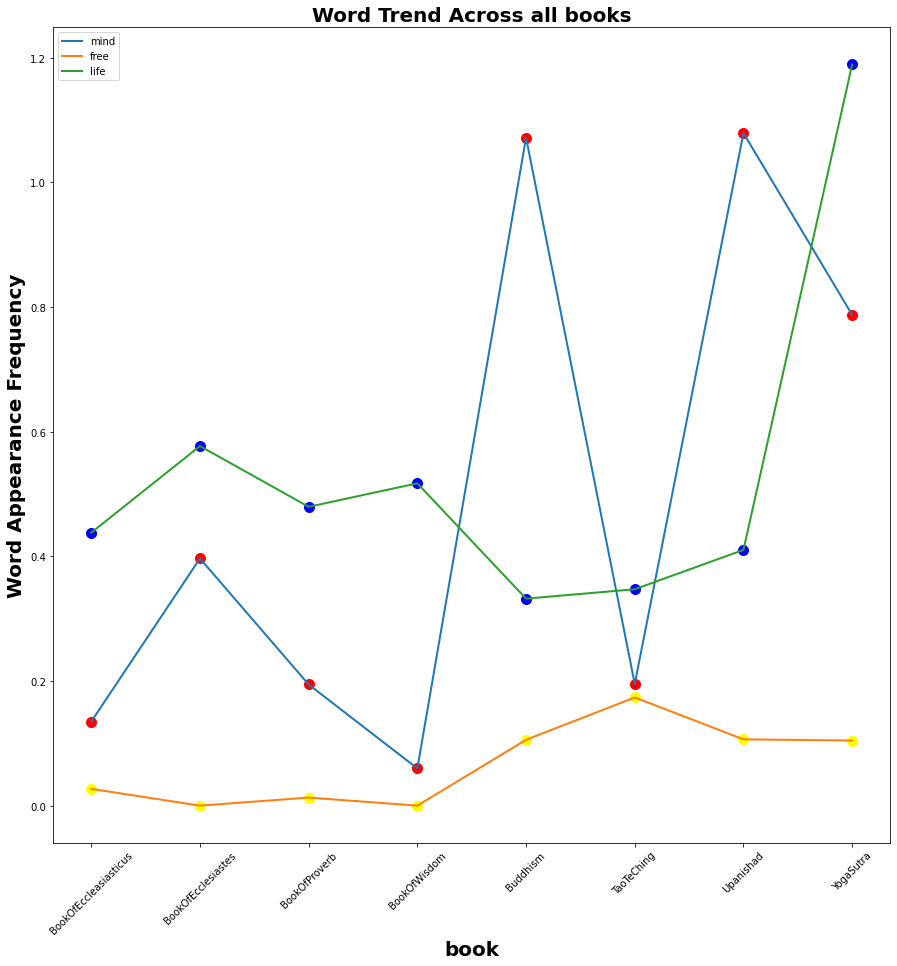

In [9]:
# plot lines
plt.scatter(book, i, color='red', s = 100)
plt.plot(book, i, label = "mind", linewidth = 2.0)
plt.scatter(book, j, color='yellow', s = 100)
plt.plot(book, j, label = "free", linewidth = 2.0)
plt.scatter(book, k, color='blue', s = 100)
plt.plot(book, k, label = "life", linewidth = 2.0)
plt.xlabel('book', fontweight='bold', fontsize = 20)
plt.ylabel("Word Appearance Frequency", fontweight='bold', fontsize = 20)
plt.title("Word Trend Across all books", fontweight='bold', fontsize = 20)
plt.xticks(rotation = 45)
plt.gcf().set_size_inches((15, 15))
plt.legend()
plt.show()

## Hypothesis

### Background / Justification

With one of our group members coming from a Catholic high school, he noticed the tremendous amount of the word "sin" appeared in his religionand how Jesus cleaned sins for us. Therefore, we believe that Western religious books may contain a large number of negative words such like sin, sinful, sinner, etc. On the other hand, coming from an Eastern country, our group has little understanding of the Eastern religions; instead, our religion focus more on personal life and spirit. 

### Null and Alternative hypothesis

As a result, we propose the following hypothesis: "Null: Books of Western religions tend to contain more negative words than Books of Eastern religions do; Alternative: Books of Western religions will have approximately equal amount of negative words comparing to the books of Eastern religion.

### Explore Sentimental Trend / Experiment

In [10]:
def sentiment(text):
    score = SentimentIntensityAnalyzer().polarity_scores(text)
    neg = score['neg']
    pos = score['pos']
    if neg > pos:
        return "Negative"
    elif pos > neg:
        return "Positive"
    else:
        return "Neutral"

copy_group = label_grouped
copy_group

posi = []
negs = []
neut = []

def book_sentiment(idxs):
    positives = 0
    negatives = 0
    neutrals = 0
    for wording in copy_group.columns:
        if sentiment(wording) == 'Negative':
            negatives += 1 * copy_group.get(wording).loc[idxs]
        elif sentiment(wording) == 'Positive':
            positives += 1 * copy_group.get(wording).loc[idxs]
        else:
            neutrals += 1 * copy_group.get(wording).loc[idxs]
    posi.append(positives) 
    negs.append(negatives)
    neut.append(neutrals)

### Friendly Reminder: Following code may take about 10 min to run; Please refer to the pdf for more details

In [11]:
book_sentiment(copy_group.index[0])
book_sentiment(copy_group.index[1])
book_sentiment(copy_group.index[2])
book_sentiment(copy_group.index[3])
book_sentiment(copy_group.index[4])
book_sentiment(copy_group.index[5])
book_sentiment(copy_group.index[6])
book_sentiment(copy_group.index[7])

In [12]:
total_sent = total.assign(pos_word_by_percentage = posi / total.get("total_num_of_word"),
                          neg_word_by_percentage = negs / total.get("total_num_of_word"),
                          neutral_by_percentage = neut / total.get("total_num_of_word"))
total_sent

,total_num_of_word,pos_word_by_percentage,neg_word_by_percentage,neutral_by_percentage
Label,,,,
BookOfEccleasiasticus,14839,0.131141,0.084035,0.784824
BookOfEcclesiastes,2773,0.126578,0.095204,0.778219
BookOfProverb,7716,0.114178,0.102255,0.783567
BookOfWisdom,5027,0.121743,0.091705,0.786553
Buddhism,6624,0.093146,0.065519,0.841335
TaoTeChing,4608,0.120660,0.068793,0.810547
Upanishad,6579,0.111567,0.050920,0.837513
YogaSutra,12443,0.097886,0.043076,0.859037


### Visualize sentimental trend

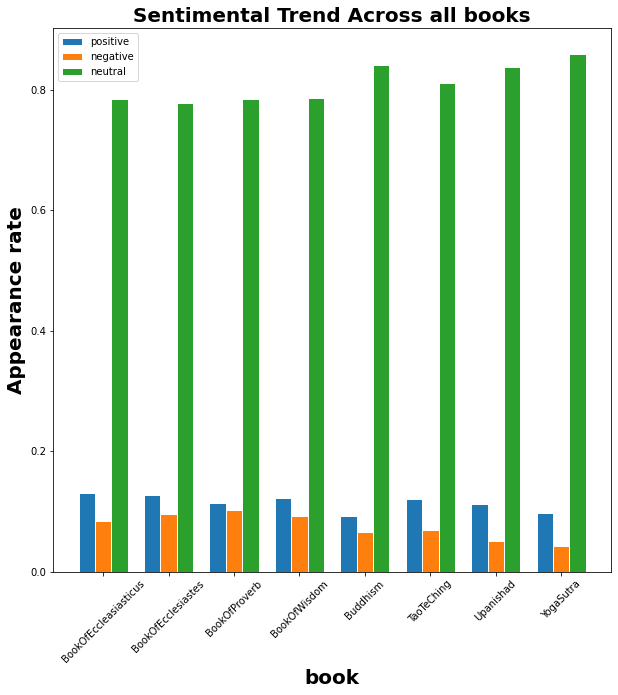

In [13]:
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = list(total_sent.get("pos_word_by_percentage"))
bars2 = list(total_sent.get("neg_word_by_percentage"))
bars3 = list(total_sent.get("neutral_by_percentage"))
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='positive')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='negative')
plt.bar(r3, bars3, width=barWidth, edgecolor='white', label='neutral')
 
# Add xticks on the middle of the group bars
plt.xlabel('book', fontweight='bold', fontsize = 20)
plt.ylabel('Appearance rate', fontweight='bold', fontsize = 20)
plt.title("Sentimental Trend Across all books", fontweight='bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(bars1))], total_sent.index)

plt.xticks(rotation = 45)
plt.gcf().set_size_inches((10, 10))
 
# Create legend & Show graphic
plt.legend()
plt.show()

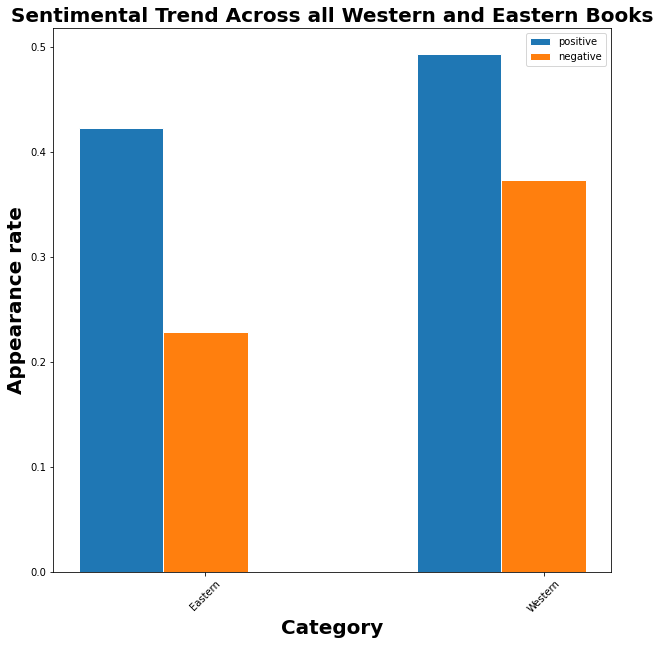

In [14]:
divide = total_sent.assign(category = ["Western", "Western", "Western", "Western", "Eastern",
                                                   "Eastern", "Eastern", "Eastern"])
divide = divide.groupby("category").sum()

# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = list(divide.get("pos_word_by_percentage"))
bars2 = list(divide.get("neg_word_by_percentage"))

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='positive')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='negative')
 
# Add xticks on the middle of the group bars
plt.xlabel('Category', fontweight='bold', fontsize = 20)
plt.ylabel('Appearance rate', fontweight='bold', fontsize = 20)
plt.title("Sentimental Trend Across all Western and Eastern Books", fontweight='bold', fontsize = 20)
plt.xticks([r + barWidth for r in range(len(bars1))], divide.index)

plt.xticks(rotation = 45)
plt.gcf().set_size_inches((10, 10))
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [15]:
neg_percentage = total_sent.get(["neg_word_by_percentage"])
neg_percentage = neg_percentage.assign(category = ["Western", "Western", "Western", "Western", "Eastern",
                                                   "Eastern", "Eastern", "Eastern"])
neg_percentage

,neg_word_by_percentage,category
Label,,
BookOfEccleasiasticus,0.084035,Western
BookOfEcclesiastes,0.095204,Western
BookOfProverb,0.102255,Western
BookOfWisdom,0.091705,Western
Buddhism,0.065519,Eastern
TaoTeChing,0.068793,Eastern
Upanishad,0.050920,Eastern
YogaSutra,0.043076,Eastern


### A | B testing

In [16]:
testing = neg_percentage.groupby("category").mean()

observed_difference = (
                      testing
                      .get("neg_word_by_percentage")
                      .loc["Western"] 
                      - testing
                      .get("neg_word_by_percentage")
                      .loc["Eastern"]
                      )

differences = []

for _ in range(1000):
    shuffled_book = np.random.permutation(neg_percentage.get("neg_word_by_percentage"))
    shuffled = neg_percentage.assign(shuffled_books = shuffled_book)
    means = shuffled.groupby("category").mean()
    difference = means.get("shuffled_books").loc["Western"] - means.get("shuffled_books").loc["Eastern"]
    differences.append(difference)

### P-value

In [17]:
p_value = (len([i for i in differences if i >= observed_difference]) / len(differences))
p_value

0.021

### Visualize results

Text(0.5, 1.0, 'Mean Difference of % of negative word between Western Religion and Eastern Religion')

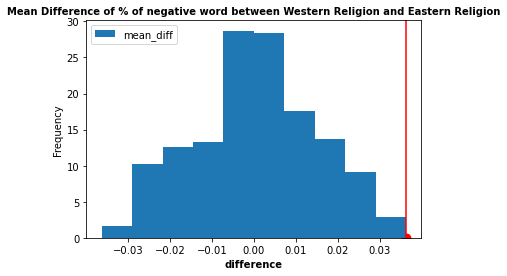

In [18]:
pd.DataFrame().assign(mean_diff = differences).plot(kind='hist', bins=10, density = True)
plt.scatter(observed_difference, 0, color='red', s = 80)
plt.axvline(x = observed_difference, color = "red")
plt.xlabel('difference', fontweight='bold', fontsize = 10)
plt.title("Mean Difference of % of negative word between Western Religion and Eastern Religion", 
          fontweight='bold', fontsize = 10)

### Results of our experiment

After running the A|B test, we found that the p-value is less than 0.05. This means that the result we got is statistically significant. Our data shows that the Western religious books have higher proportions of negative words compare to the Eastern religious books.

# Prompt Part Four: Finding Top 20 Words

In [19]:
# method that list the top 20 words in list of tuple
def word_count(col_name):
    row = label_grouped[label_grouped.index == col_name]
    num = list(row.loc[col_name])
    word_num = dict()
    for col in range(len(num)):
        word_num[column[col]] = num[col]
    sort_num = [(word, number) for word, number in sorted(word_num.items(), 
                                                          key=lambda item: item[1], 
                                                          reverse = True)]
    return sort_num[:20]

# method that list the top 20 words in list of string
def freq_word(col_names): 
    row = label_grouped[label_grouped.index == col_names]
    num = list(row.loc[col_names])
    word_num = dict()
    for col in range(len(num)):
        word_num[column[col]] = num[col]
    sort_num = [word for word, number in sorted(word_num.items(), 
                                                key=lambda item: item[1], 
                                                reverse = True)]
    return sort_num[:20]

# method that list the sorted list of string
def freqs_word(col_names): 
    row = label_grouped[label_grouped.index == col_names]
    num = list(row.loc[col_names])
    word_num = dict()
    for col in range(len(num)):
        word_num[column[col]] = num[col]
    sort_num = [word for word, number in sorted(word_num.items(), 
                                                key=lambda item: item[1], 
                                                reverse = True)]
    return sort_num

# method that visualize the top 20 words
def visualize(dataframe, name):
    dataframe.plot(kind = "barh", y = dataframe.get("word"), figsize = (4,4))
    plt.title(name + "'s top 20 words", fontsize = 15)
    plt.xlabel("word", fontsize = 11)
    plt.ylabel("count", fontsize = 11)
    
# method that produce word cloud for the top 20 words
def visualized(freq): 
    new_word = ""
    for words in freq:
        new_word += words 
        new_word += " "
    wordcloud = WordCloud(max_font_size=45, 
                          max_words=75, 
                          background_color="white",
                          width = 300,
                          height = 300).generate(new_word)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### Eccleasiasticus's top 20 words

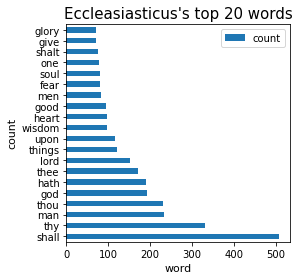

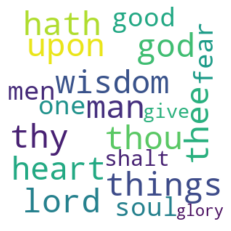

In [20]:
book_of_eccleasiasticus = pd.DataFrame(word_count("BookOfEccleasiasticus"), 
                                       columns =['word', 'count']).set_index("word")

visualize(book_of_eccleasiasticus, "Eccleasiasticus")
visualized(freq_word("BookOfEccleasiasticus"))

### Ecclesiaste's top 20 words

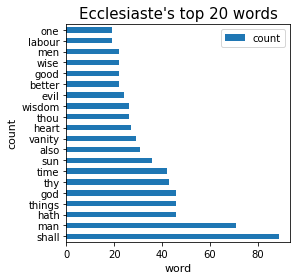

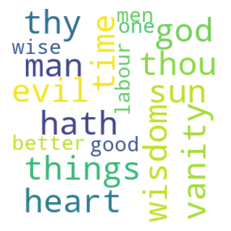

In [21]:
book_of_ecclesiastes = pd.DataFrame(word_count("BookOfEcclesiastes"), columns =['word', 'count']).set_index("word")

visualize(book_of_ecclesiastes, "Ecclesiaste")
visualized(freq_word("BookOfEcclesiastes"))

### Proverb's top 20 words

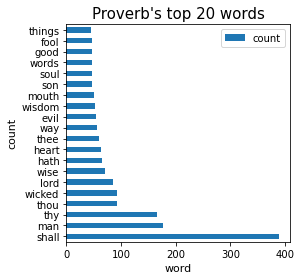

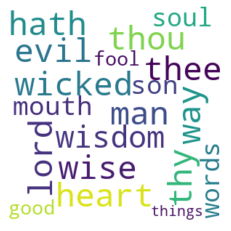

In [22]:
book_of_proverb = pd.DataFrame(word_count("BookOfProverb"), columns =['word', 'count']).set_index("word")

visualize(book_of_proverb, "Proverb")
visualized(freq_word("BookOfProverb"))

### Wisdom's top 20 words

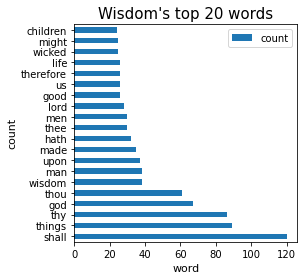

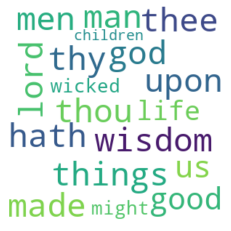

In [23]:
book_of_wisdom = pd.DataFrame(word_count("BookOfWisdom"), columns =['word', 'count']).set_index("word")

visualize(book_of_wisdom, "Wisdom")
visualized(freq_word("BookOfWisdom"))

### Buddhism's top 20 words

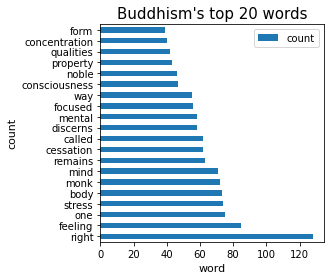

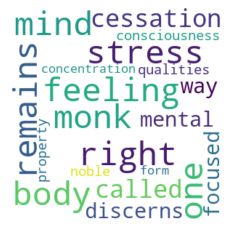

In [24]:
book_of_buddhism = pd.DataFrame(word_count("Buddhism"), columns =['word', 'count']).set_index("word")

visualize(book_of_buddhism, "Buddhism")
visualized(freq_word("Buddhism"))

### TaoTeChing's top 20 words

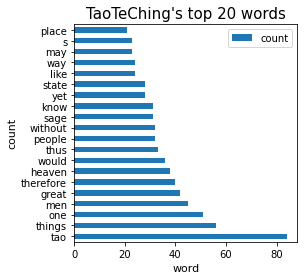

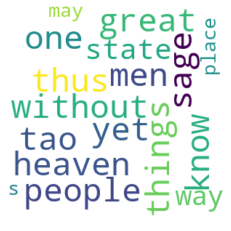

In [25]:
book_of_taoTeChing = pd.DataFrame(word_count("TaoTeChing"), columns =['word', 'count']).set_index("word")

visualize(book_of_taoTeChing, "TaoTeChing")
visualized(freq_word("TaoTeChing"))

### Upanishad's top 20 words

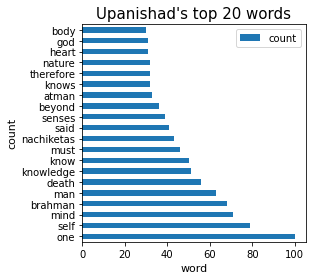

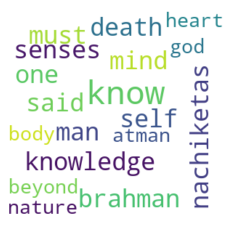

In [26]:
book_of_upanishad = pd.DataFrame(word_count("Upanishad"), columns =['word', 'count']).set_index("word")

visualize(book_of_upanishad, "Upanishad")
visualized(freq_word("Upanishad"))

### YogaSutra's top 20 words

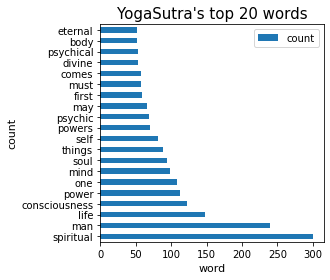

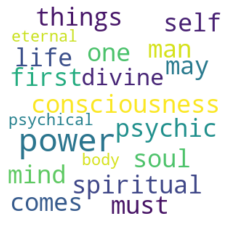

In [27]:
book_of_yogaSutra = pd.DataFrame(word_count("YogaSutra"), columns =['word', 'count']).set_index("word")

visualize(book_of_yogaSutra, "YogaSutra")
visualized(freq_word("YogaSutra"))

### Find Top 20 words throughout all books

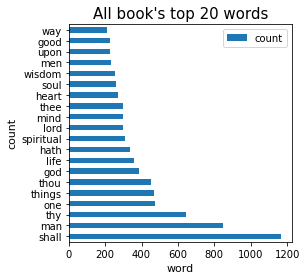

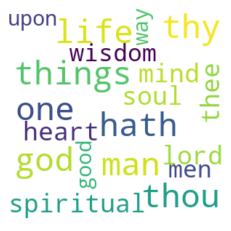

In [28]:
def unifying(bookname):
    return "books"

all_book = label_context_copy.assign(Label = label_context_copy["Label"].apply(unifying))
all_book = all_book.groupby("Label").sum()

rows = all_book[all_book.index == "books"]
nums = list(rows.loc["books"])
word_nums = dict()

for cols in range(len(nums)):
    word_nums[column[cols]] = nums[cols]

sort_nums = [(words, numbers) for words, numbers in sorted(word_nums.items(), 
                                                      key=lambda items: items[1], 
                                                      reverse = True)][:20]

sort_num = [words for words, numbers in sorted(word_nums.items(), 
                                               key=lambda items: items[1], 
                                               reverse = True)][0:20]

all_books = pd.DataFrame(sort_nums, columns = ['word', 'count']).set_index("word")
visualize(all_books, "All book")
visualized(sort_num)

# Prompt Part Five: Wording Differences among books "Proverbs", "Ecclesiastes", and "Wisdom"

### Import Machine Learning Packages

In [29]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split

### Label the book (Divide Book into different chapter)

In [30]:
old_testament1 = label_context[(label_context.get("Unnamed: 0").str.contains("Proverb"))]
old_testament2 = label_context[(label_context.get("Unnamed: 0").str.contains("Wisdom"))]
old_testament3 = label_context[(label_context.get("Unnamed: 0").str.contains("Ecclesiastes"))]

def rename(original_name):
    if "Proverb" in original_name:
        return "Proverb"
    if "Ecclesiastes" in original_name:
        return "Ecclesiastes"
    if "Wisdom" in original_name:
        return "Wisdom"

# copy the dataframe to create more training data
label_context1 = old_testament1.assign(label = old_testament1.get("Unnamed: 0").apply(rename))
label_context1 = label_context1.set_index("label").drop(columns = "Unnamed: 0")
label_context2 = old_testament2.assign(label = old_testament2.get("Unnamed: 0").apply(rename))
label_context2 = label_context2.set_index("label").drop(columns = "Unnamed: 0")
label_context3 = old_testament3.assign(label = old_testament3.get("Unnamed: 0").apply(rename))
label_context3 = label_context3.set_index("label").drop(columns = "Unnamed: 0")

old_testament = label_context1[0:0]

for i in range(12):
    old_testament = pd.concat([old_testament, label_context1[i:i+1]])
    old_testament = pd.concat([old_testament, label_context2[i:i+1]])
    old_testament = pd.concat([old_testament, label_context3[i:i+1]])
old_testament.head(9)

,foolishness,hath,wholesome,takest,feelings,anger,vaivaswata,matrix,kindled,convict,...,erred,thinkest,modern,reigned,sparingly,visual,thoughts,illumines,attire,explains
label,,,,,,,,,,,,,,,,,,,,,
Proverb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wisdom,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
Ecclesiastes,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Proverb,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wisdom,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Ecclesiastes,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Proverb,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Wisdom,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ecclesiastes,0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### DecisionTreeClassifier (I will convert the number of words into percentage of time each word appear in corresponding chapter)

In [31]:
subject_X_trial = old_testament.values.tolist()
category_Y = np.array(old_testament.index)

# convert the number of words into percentage of time each word appear in corresponding chapter
subject_X = [[i / sum(col) for i in col] for col in subject_X_trial]

num_training = int(0.7 * old_testament.shape[0])
num_testing = int(0.3 * old_testament.shape[0])

subject_train_X = subject_X[0: num_training]
subject_test_X = subject_X[num_training:]

category_train_Y = category_Y[0: num_training]
category_test_Y = category_Y[num_training:]

def train_DT(X, Y):
    clf = DecisionTreeClassifier()
    clf.fit(X, Y)
    return clf

subject_clf = train_DT(subject_train_X, category_train_Y)

subject_predicted_train_Y = subject_clf.predict(subject_test_X)
print(classification_report(category_test_Y,subject_predicted_train_Y))

              precision    recall  f1-score   support

Ecclesiastes       1.00      1.00      1.00         4
     Proverb       0.00      0.00      0.00         3
      Wisdom       0.25      0.25      0.25         4

    accuracy                           0.45        11
   macro avg       0.42      0.42      0.42        11
weighted avg       0.45      0.45      0.45        11



### Conclusion for Wording Differences among books "Proverbs", "Ecclesiastes", and "Wisdom"

Through observation, we noticed that even though Proverbs, Ecclesiastes, and Wisdom are all three books from the Old Testament,  the different periods of time when these three books were written have made some of their word choices different. For example, when trying to express the meaning of God, or deity, the book Proverbs tends to use more “lord” instead of “God”; however, the book Ecclesiastes tends to use more “God” instead of “lord”. We think it is a pretty interesting pattern to notice, and thus, we have defined a ML model to help determine which book the given words distribution belong to. This ML model collected data of the word counts in each book, and found the trend in each book. 

Based on the results of machine learning predictions from DecisionTreeClassifier model. We can see that the predictions accuracy for books “Ecclesiastes” is much higher than the rest two books, which indicates that the word distribution between "Ecclesiastes" and the rest two books are significantly different because the accuracy score will be super low if the word distribution is similar since the machine cannot distinguish between "Ecclesiastes" and the other two books. Therefore, we conclude that the word usage is different between "Ecclesiastes" and the other two books though they all come from the old testament. One obvious example will be "God" and "Lord" that we mentioned before.

### Visualization that will prove the result from machine learning model

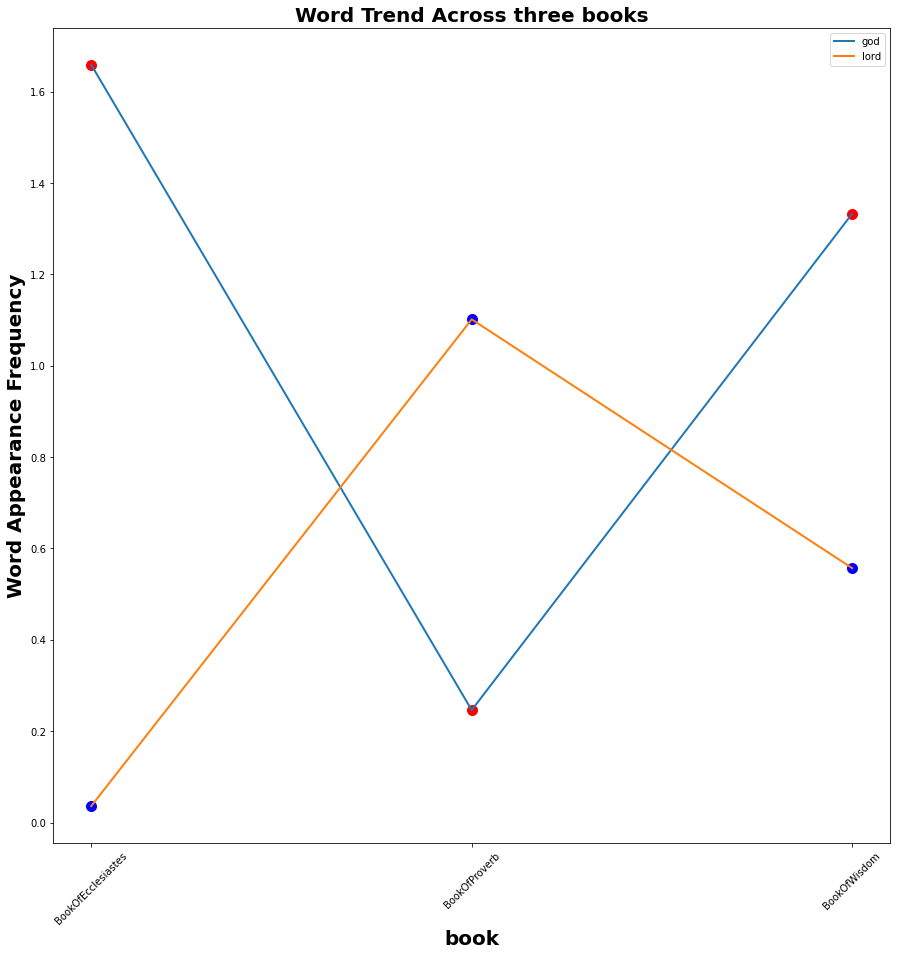

In [32]:
label_groups = label_grouped[1:4]
num_god1 = label_groups.get(["god"]).merge(total, left_index = True, right_index = True)
num_god1 = num_god1.assign(word_appearance_percentage = 100 * num_god1["god"] / total["total_num_of_word"])
num_lord1 = label_groups.get(["lord"]).merge(total, left_index = True, right_index = True)
num_lord1 = num_lord1.assign(word_appearance_percentage = 100 * num_lord1["lord"] / total["total_num_of_word"])

books = book[1:4]

a1 = list(num_god1.get("word_appearance_percentage"))
b1 = list(num_lord1.get("word_appearance_percentage"))
plt.scatter(books, a1, color='red', s = 100)
plt.plot(books, a1, label = "god", linewidth = 2.0)
plt.scatter(books, b1, color='blue', s = 100)
plt.plot(books, b1, label = "lord", linewidth = 2.0)
plt.xlabel('book', fontweight='bold', fontsize = 20)
plt.ylabel("Word Appearance Frequency", fontweight='bold', fontsize = 20)
plt.title("Word Trend Across three books", fontweight='bold', fontsize = 20)
plt.xticks(rotation = 45)
plt.gcf().set_size_inches((15, 15))
plt.legend()
plt.show()

# Prompt Part Six: Buddhism and Taoism

### Background research 

Based on our research, Taoism and Buddhism shared many similar practices and beliefs, the most common of which are meditation and reincarnation. The followers tend to practice with harmony and balance throughout their lives. In contrast with Western religion, Taoism and Buddhism do not contain any ideas of worshiping the creator god; instead, they both focus on personal and spiritual development, which lead followers to better understand the nature and reality. 

### Word that we come up with after research

In [33]:
unlikely_to_appear = "gods deity divine powers superior worshipping holy christ gospel grace mercy trespass amen above \
                      afterlife"

likely_to_appear = "meditations minds peaceful mentally nirvana reincarnations life death rebirth \
                    spiritual equality balances harmony fair freedom concentration nature return state"

### Hypothesis about word usage in books "TaoTeChing" and "Buddhism"

Null Hypothesis: Words from two lists (“likely” and “unlikely”) that we have defined above are equally distributed in both “TaoTeChing” and “Buddhism”.

Alternate Hypothesis: Both “TaoTeChing” and “Buddhism” are more likely to contain words from the “likely” list rather than “unlikely” list.

### Filter the words in books "TaoTeChing" and "Buddhism"

In [34]:
stop_word = stopwords.words('english')
            
tao_budd = label_grouped[4:6]

sum_word = tao_budd.sum(axis=1)
total_words = (sum_word["Buddhism"], sum_word["TaoTeChing"])

drop_list = []
unrelated = ["arm", "con", "vine", "eat", "ass", "reed", "lit", "nation", "lances", "hip", "ship", "pin", "air", 
             "harm", "nations", "owe", "men", "turn"]

for wordings in column:
    if (wordings not in unlikely_to_appear) and (wordings not in likely_to_appear):
        drop_list.append(wordings)
    elif wordings in stop_word:
        drop_list.append(wordings)
    elif len(wordings) < 3:
        drop_list.append(wordings)
    elif ("NN" not in nltk.pos_tag([wordings])[0][1]) \
    and ("JJ" not in nltk.pos_tag([wordings])[0][1]) \
    and ("VB" not in nltk.pos_tag([wordings])[0][1]):
        drop_list.append(wordings)
    elif wordings in unrelated:
         drop_list.append(wordings)
            
tao_budd = tao_budd.drop(columns = drop_list)
taos = [i / total_words[0] for i in tao_budd.iloc[1]]
budds = [j / total_words[1] for j in tao_budd.iloc[0]]
tao_budd

,gospel,spiritual,spirit,worship,quality,christ,meditations,harmony,grace,balance,...,worshipping,peaceful,return,holy,gods,equal,mental,freedom,meditation,state
Label,,,,,,,,,,,,,,,,,,,,,
Buddhism,0,0,0,0,2,0,0,0,0,0,...,0,0,1,12,0,0,58,2,1,0
TaoTeChing,0,2,1,0,1,0,0,4,1,0,...,0,0,9,0,0,2,0,1,0,28


In [35]:
budd_unlikely_score = 0
budd_likely_score = 0
tao_unlikely_score = 0
tao_likely_score = 0

for words in tao_budd.columns:
    if words in unlikely_to_appear:
        tao_unlikely_score += tao_budd.get(words).iloc[0]
        budd_unlikely_score += tao_budd.get(words).iloc[1]
    elif words in likely_to_appear:
        tao_likely_score += tao_budd.get(words).iloc[0]
        budd_likely_score += tao_budd.get(words).iloc[1]

### Hypothesis Testing For The Result of TaoTeChing

In [36]:
total_tao = tao_likely_score + tao_unlikely_score
tao_diff_likely_unlikely = tao_likely_score - tao_unlikely_score
result_tao = np.array([])

for _ in range(1000):
    new_tao = np.random.multinomial(total_tao, [0.5, 0.5])
    result_tao = np.append(result_tao, new_tao[1] - new_tao[0])

### Visualizing Hypothesis Testing For The Result of TaoTeChing

Text(0.5, 1.0, 'Mean difference between # words from likely list and unlikely list (TaoTeChing)')

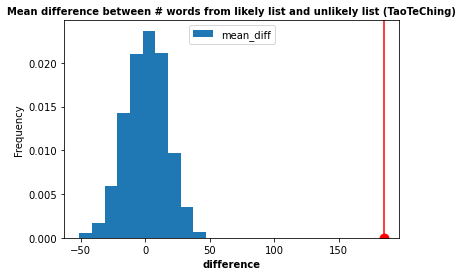

In [37]:
pd.DataFrame().assign(mean_diff = result_tao).plot(kind='hist', bins=10, density = True)
plt.scatter(tao_diff_likely_unlikely, 0, color='red', s = 80)
plt.axvline(x = tao_diff_likely_unlikely, color = "red")
plt.xlabel('difference', fontweight='bold', fontsize = 10)
plt.title("Mean difference between # words from likely list and unlikely list (TaoTeChing)",
          fontweight='bold', fontsize = 10)

### P-value For The Hypothesis Testing (TaoTeChing)

In [38]:
p_value_tao = (len([i for i in result_tao if i >= tao_diff_likely_unlikely]) / len(result_tao))
p_value_tao

0.0

### Hypothesis Testing For The Result of Buddhism

In [39]:
total_budd = budd_unlikely_score + budd_likely_score
budd_diff_likely_unlikely = budd_likely_score - budd_unlikely_score
result_budd = np.array([])
for _ in range(1000):
    new_budd = np.random.multinomial(total_budd, [0.5, 0.5])
    result_budd = np.append(result_budd, new_budd[1] - new_budd[0])

### Visualizing Hypothesis Testing For The Result of Buddhism

Text(0.5, 1.0, 'Mean difference between # words from likely list and unlikely list (Buddhism)')

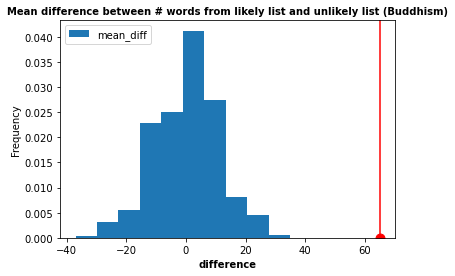

In [40]:
pd.DataFrame().assign(mean_diff = result_budd).plot(kind='hist', bins=10, density = True)
plt.scatter(budd_diff_likely_unlikely, 0, color='red', s = 80)
plt.axvline(x = budd_diff_likely_unlikely, color = "red")
plt.xlabel('difference', fontweight='bold', fontsize = 10)
plt.title("Mean difference between # words from likely list and unlikely list (Buddhism)", 
          fontweight='bold', fontsize = 10)

### P-value For The Hypothesis Testing (Buddhism)

In [41]:
p_value_buddhism = (len([i for i in result_budd if i >= budd_diff_likely_unlikely]) / len(result_budd))
p_value_buddhism

0.0

### Visualize our findings

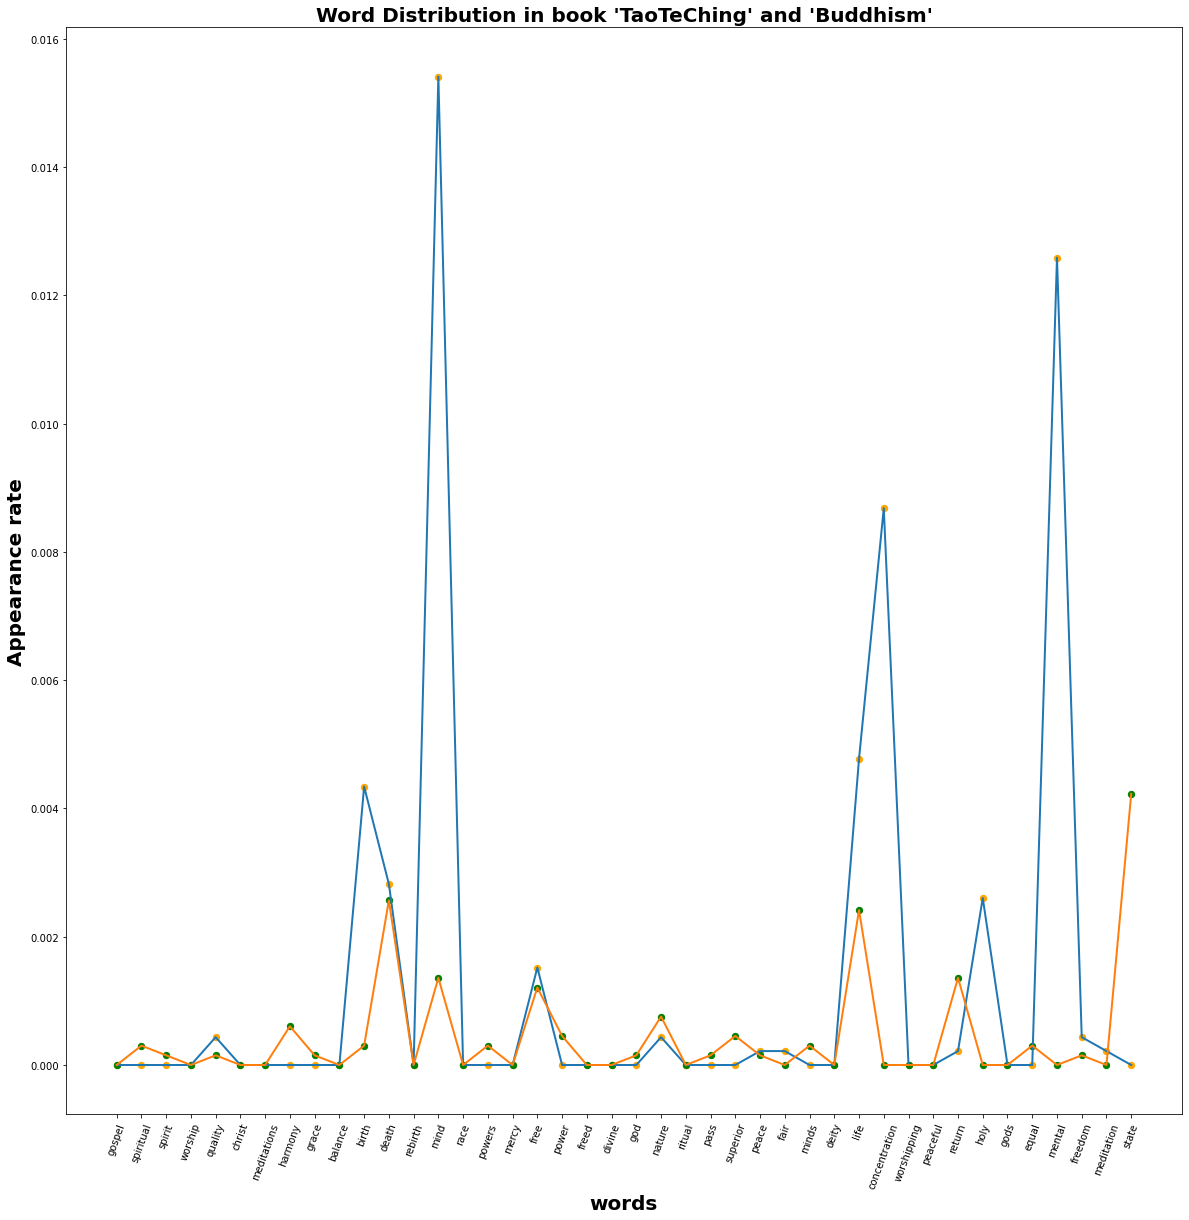

In [42]:
plt.plot(tao_budd.columns, budds, label = "Buddhism", linewidth = 2.0)
plt.scatter(tao_budd.columns, budds, color='orange', s = 40)
plt.plot(tao_budd.columns, taos, label = "TaoTeChing", linewidth = 2.0)
plt.scatter(tao_budd.columns, taos, color='green', s = 40)
plt.xticks(rotation = 70)
plt.xlabel('words', fontweight='bold', fontsize = 20)
plt.ylabel('Appearance rate', fontweight='bold', fontsize = 20)
plt.title("Word Distribution in book 'TaoTeChing' and 'Buddhism'", fontweight='bold', fontsize = 20)
plt.gcf().set_size_inches((20, 20))

### Conclusion For "TaoTeChing" and "Buddhism"

By using for loop, we found out that the number of words from the “likely” list is greater than the words from the “unlikely” list for both “TaoTeChing” and “Buddhism”. Then, we produced bootstrap testing and found out that p-values are approximately equal to zero for both “TaoTeChing” and “Buddhism” results, which proves that our findings are significant. Furthermore, we produce a line graph that shows the trend of word distribution for both “TaoTeChing” and “Buddhism” and we surprisingly see that the trend is pretty similar between two books. Therefore, we conclude that the word usage for both “TaoTeChing” and “Buddhism” are similar.

Both religions advocate equality among all living things. Men and women have no distinctions and animals are considered equal to humans. According to diffen.com, there are many similarities between Buddhism and Taosim. They both value the equality between all creatures, especially they both propose to treat animals equally. Their goals are similar: Buddhism wants to eliminate mental suffering, whereas Taoism wants to find a balance in life, both in the sense of self-development. They even have a similar practice: meditation. Their similarities can be supported by investigating the word usage in the scriptures, according to our results in Part Four, which is the extensive use of words like “mind”, “mental”, “concentration”, and “state”. 

# Main Conclusion

From our exploration of these eight religious books and their word usages, we have found some interesting patterns that support the claim that the Western religions and the Eastern religions are different in terms of their focuses. The Western religious books are more likely to contain words related to god, mercy, pray, etc. because of their characteristics of monotheistic. In contrast, the Eastern religious books are more likely to contain words related to nature, reality, spiritual, etc. because of their focus on personal spiritual development. Also, the word usage may also vary within the Western Religions. For example, Proverbs are more likely to represent God as “Lord” and Ecclesiastes are more likely to represent God as “god.”

Indeed, there are many hidden patterns in this powerful dataset that we were trying to work on but failed to reach a conclusion. Therefore, if we had a more abundant amount of time, we would like to spend more time learning different packages and models to help us analyze our data.

Thank you for organizing this amazing event! It helped us, a group of first-year Data Science students, experience what a real-world project is like, allowing us to obtain a wonderful experience!